<a href="https://colab.research.google.com/github/inoueshinji8/PythonStudy/blob/main/easyocrtest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.yurui-deep-learning.com/2021/01/25/%E7%B0%A1%E5%8D%98%E3%81%ABocr%E5%87%A6%E7%90%86%E3%81%8C%E3%81%A7%E3%81%8D%E3%82%8Beasyocr%E3%82%92google-colab%E3%81%A7%E8%A9%A6%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/
簡単にOCR処理ができるEasyOCRをGoogle Colabで試してみた

日本語対応しているOCRのオープンソースがあったので試してみました。

https://github.com/JaidedAI/EasyOCR

内部のコードはPyTorchベースで実装されているのでGPUで動作するため、RUNTIMEはGPUで動作させます。

Runtime->Change runtime type で下記の画面になるのでHardware acceleratorをGPUに設定します。

ランタイムを先にやりましょう

In [15]:
!pip install easyocr --no-deps # Colab already has all dependencies

     |████████████████████████████████| 63.6 MB 1.4 MB/s 


In [1]:
! pip install python-bidi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls
%cd drive/MyDrive

drive  sample_data
/content/drive/MyDrive


In [12]:
!ls
%cd word_cloud/
#ここにあったか

'Colab Notebooks'		  savetest3
 datatest1			  sendsound
 firsttest1.gsheet		  shinshu
 KITERETU			  testdrive1
'no_name_houseworks (1).gsheet'   usualbuy.csv
 no_name_houseworks.gsheet	  vNote.vnt
 output				  word_cloud
 pictlesson			  ziptestroom
 programtest_plane1		  時間と充電率の気分的な安心感.gsheet
 R210816c13.txt			  無題のプロジェクト.gscript
 savetest1			  レス用メモ.gdoc
 savetest2			  買い物リスト.gsheet
/content/drive/MyDrive/word_cloud


In [13]:
!ls

ocrtxt.txt  TEM_DATA.tif  word_cloud.png  word.txt


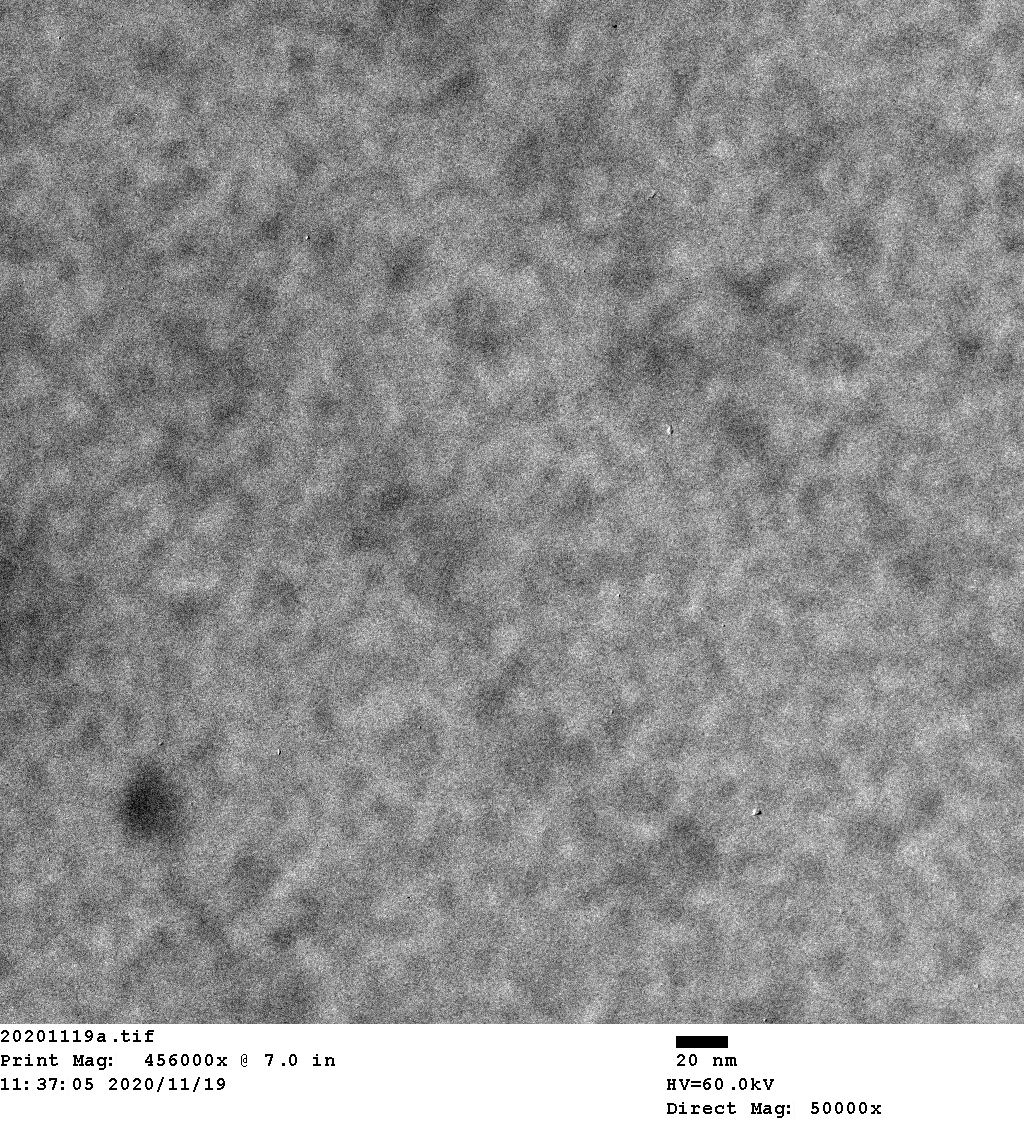

In [14]:
import PIL
from PIL import ImageDraw
tif_img = "TEM_DATA.tif"
im = PIL.Image.open(tif_img)
im

In [16]:
# Doing OCR. Get bounding boxes.
import easyocr
reader = easyocr.Reader(['ja','en'])
bounds = reader.readtext(tif_img)
bounds

[([[0, 1024], [109, 1024], [109, 1045], [0, 1045]],
  '20201119a',
  0.7478750689313105),
 ([[117, 1027], [157, 1027], [157, 1045], [117, 1045]],
  'tif',
  0.12848715555332582),
 ([[0, 1053], [61, 1053], [61, 1069], [0, 1069]], 'Print', 0.9505600286333689),
 ([[69, 1051], [116, 1051], [116, 1075], [69, 1075]],
  'Hag:',
  0.43141406774520874),
 ([[141, 1049], [231, 1049], [231, 1069], [141, 1069]],
  '4560oox',
  0.44900179420383307),
 ([[309, 1051], [337, 1051], [337, 1069], [309, 1069]],
  'in',
  0.999925316601287),
 ([[673, 1051], [701, 1051], [701, 1069], [673, 1069]],
  '20',
  0.9995997127020211),
 ([[711, 1055], [739, 1055], [739, 1069], [711, 1069]],
  'nm',
  0.9990421365539573),
 ([[0, 1073], [97, 1073], [97, 1093], [0, 1093]],
  '11:37:05',
  0.4866472253236935),
 ([[105, 1073], [229, 1073], [229, 1093], [105, 1093]],
  '2020/11/19',
  0.8841290923312386),
 ([[663, 1075], [729, 1075], [729, 1093], [663, 1093]],
  'HV=60',
  0.22291232026637794),
 ([[737, 1077], [777, 1077]

小数点の後を「オー」として認識しがちです

倍率の略のMagがHagとかuagとかで取れていません

それでも、PyOCRより精度が高いですね

理工学、いや文科省の学校教科書のレベルで勉強して教科書、図鑑、辞書、百科事典、大学専門書に特化した言語系深層学習データセットの登場が望まれます